In [1]:
#!python -m pip install -q git+https://github.com/wilhelm-lab/dlomix

In [2]:
#!python -m pip install wandb

# Preprocess the data

In [3]:
import pandas as pd
import re
import numpy as np
import csv

## Read the input data

In [4]:
input_file1 = "ptm/input_data/TUM_mod_citrullination_l.parquet"
input_file2 = "ptm/input_data/TUM_mod_citrullination_2.parquet"

## Create dataframe

In [5]:
tmp_data1 = pd.read_parquet(input_file1, engine='pyarrow')
tmp_data2 = pd.read_parquet(input_file2, engine='pyarrow')
data = pd.concat([tmp_data1,tmp_data2])

In [6]:
data.head(10)

,raw_file,scan_number,modified_sequence,precursor_charge,fragmentation,mass_analyzer,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,intensities_raw,masses_raw,collision_energy_aligned_normed,method_nbr,precursor_charge_onehot
0,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,35139,EYYLRYLEK,2,CID,ITMS,271.260,9,1.958759e+06,3.245907e+07,35.0,35.000000,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.15, 0.0, -1...","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 276.09326, 0....",0.35000,2,"[0, 1, 0, 0, 0, 0]"
1,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,11544,R[UNIMOD:7]SEDAELR,2,CID,ITMS,82.750,8,4.594588e+04,1.248751e+06,35.0,35.000000,"[0.3285714285714286, 0.0, -1.0, 0.014285714285...","[175.10437, 0.0, -1.0, 158.10068, 0.0, -1.0, 2...",0.35000,2,"[0, 1, 0, 0, 0, 0]"
2,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,11374,R[UNIMOD:7]SEDAELR,2,CID,ITMS,82.750,8,6.663102e+04,1.764581e+06,35.0,35.000000,"[0.24705882352941178, 0.0, -1.0, 0.01176470588...","[175.08893, 0.0, -1.0, 158.1032, 0.0, -1.0, 28...",0.35000,2,"[0, 1, 0, 0, 0, 0]"
3,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,31901,LMKFSR[UNIMOD:7]PK,2,HCD,FTMS,82.750,8,2.662628e+05,7.981456e+06,28.0,28.745977,"[0.22, 0.0, -1.0, 0.0, 0.0, -1.0, 0.68, 0.0, -...","[147.11301, 0.0, -1.0, 0.0, 0.0, -1.0, 244.165...",0.28746,1,"[0, 1, 0, 0, 0, 0]"
4,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,32338,LRVDPVDFK,3,CID,ITMS,82.831,9,1.779733e+06,1.403539e+07,35.0,35.000000,"[0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[147.5854, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.35000,2,"[0, 0, 1, 0, 0, 0]"
5,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,36206,R[UNIMOD:7]GSLEEIMK,2,CID,ITMS,82.831,9,4.377941e+04,8.755105e+05,35.0,35.000000,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 1.0, 0.0, -1....","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 278.12317, 0....",0.35000,2,"[0, 1, 0, 0, 0, 0]"
6,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,32813,LRVDPVDFK,3,CID,ITMS,82.831,9,1.342419e+05,1.169074e+06,35.0,35.000000,"[0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.3, 0.0, 0.0,...","[147.07063, 0.0, 0.0, 0.0, 0.0, 0.0, 294.16437...",0.35000,2,"[0, 0, 1, 0, 0, 0]"
7,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,51100,VDTFLDGFSVK,2,HCD,FTMS,83.045,11,2.550472e+05,1.812981e+06,28.0,28.745977,"[0.05, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[147.11281, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.28746,1,"[0, 1, 0, 0, 0, 0]"
8,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,58853,VDTFLDGFSVK,2,HCD,FTMS,83.045,11,1.675168e+05,1.195226e+06,28.0,28.745977,"[0.07, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[147.11238, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.28746,1,"[0, 1, 0, 0, 0, 0]"
9,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,31153,HTAYSDFLSDK,2,HCD,FTMS,83.137,11,9.453002e+04,1.875683e+06,28.0,28.745977,"[0.22, 0.0, -1.0, 0.0, 0.0, -1.0, 0.25, 0.0, -...","[147.1124, 0.0, -1.0, 0.0, 0.0, -1.0, 262.1381...",0.28746,1,"[0, 1, 0, 0, 0, 0]"


## Divide data into HCD and CID

In [7]:
data_HCD = data[data['fragmentation']=='HCD']
data_CID = data[data['fragmentation']=='CID']

In [8]:
data_HCD.head(10)

,raw_file,scan_number,modified_sequence,precursor_charge,fragmentation,mass_analyzer,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,intensities_raw,masses_raw,collision_energy_aligned_normed,method_nbr,precursor_charge_onehot
3,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,31901,LMKFSR[UNIMOD:7]PK,2,HCD,FTMS,82.750,8,2.662628e+05,7.981456e+06,28.0,28.745977,"[0.22, 0.0, -1.0, 0.0, 0.0, -1.0, 0.68, 0.0, -...","[147.11301, 0.0, -1.0, 0.0, 0.0, -1.0, 244.165...",0.28746,1,"[0, 1, 0, 0, 0, 0]"
7,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,51100,VDTFLDGFSVK,2,HCD,FTMS,83.045,11,2.550472e+05,1.812981e+06,28.0,28.745977,"[0.05, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[147.11281, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.28746,1,"[0, 1, 0, 0, 0, 0]"
8,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,58853,VDTFLDGFSVK,2,HCD,FTMS,83.045,11,1.675168e+05,1.195226e+06,28.0,28.745977,"[0.07, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[147.11238, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.28746,1,"[0, 1, 0, 0, 0, 0]"
9,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,31153,HTAYSDFLSDK,2,HCD,FTMS,83.137,11,9.453002e+04,1.875683e+06,28.0,28.745977,"[0.22, 0.0, -1.0, 0.0, 0.0, -1.0, 0.25, 0.0, -...","[147.1124, 0.0, -1.0, 0.0, 0.0, -1.0, 262.1381...",0.28746,1,"[0, 1, 0, 0, 0, 0]"
10,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,35819,HLTGLTFDTYK,2,HCD,FTMS,83.182,11,2.737666e+05,2.303711e+06,28.0,28.745977,"[0.14, 0.0, -1.0, 0.04, 0.0, -1.0, 0.09, 0.0, ...","[147.11293, 0.0, -1.0, 138.06619, 0.0, -1.0, 3...",0.28746,1,"[0, 1, 0, 0, 0, 0]"
13,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,12635,EREELGSPEER,2,HCD,FTMS,83.204,11,3.792262e+05,1.295094e+07,28.0,28.745977,"[0.5675675675675675, 0.0, -1.0, 0.0, 0.0, -1.0...","[175.1189, 0.0, -1.0, 0.0, 0.0, -1.0, 304.1611...",0.28746,1,"[0, 1, 0, 0, 0, 0]"
17,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,24840,VAELRSLYK,3,HCD,FTMS,83.456,9,4.868870e+06,4.552416e+07,28.0,28.745977,"[0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.19, 0.0, 0.0,...","[147.11301, 0.0, 0.0, 0.0, 0.0, 0.0, 310.17636...",0.28746,1,"[0, 0, 1, 0, 0, 0]"
19,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,31390,EDPMR[UNIMOD:7]ELR,2,HCD,FTMS,82.452,8,3.965483e+05,3.148274e+06,28.0,28.745977,"[0.15, 0.0, -1.0, 0.0, 0.0, -1.0, 0.14, 0.0, -...","[175.11913, 0.0, -1.0, 0.0, 0.0, -1.0, 288.203...",0.28746,1,"[0, 1, 0, 0, 0, 0]"
20,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,25231,DLAQR[UNIMOD:7]SFR,2,HCD,FTMS,82.452,8,5.950818e+04,1.012012e+06,28.0,28.745977,"[0.42, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.1189, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0...",0.28746,1,"[0, 1, 0, 0, 0, 0]"
23,02207a_BA1-TUM_mod_citrullination_l_1_01_01-DD...,30103,EDPMR[UNIMOD:7]ELR,2,HCD,FTMS,82.452,8,5.526744e+05,4.336611e+06,28.0,28.745977,"[0.13, 0.0, -1.0, 0.0, 0.0, -1.0, 0.18, 0.0, -...","[175.11887, 0.0, -1.0, 0.0, 0.0, -1.0, 288.202...",0.28746,1,"[0, 1, 0, 0, 0, 0]"


## Sort for modified_sequence and sort andromeda_score from highest to lowest

In [9]:
data_HCD = data_HCD.sort_values(['modified_sequence', 'andromeda_score'], ascending=[True, False])

In [10]:
data_HCD.head(10)

,raw_file,scan_number,modified_sequence,precursor_charge,fragmentation,mass_analyzer,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,intensities_raw,masses_raw,collision_energy_aligned_normed,method_nbr,precursor_charge_onehot
9763,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36606,AAADQMRDFLVR,3,HCD,FTMS,142.080,12,4.299898e+06,1.623440e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0...","[175.11903, 0.0, 0.0, 0.0, 0.0, 0.0, 274.18799...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
15599,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36606,AAADQMRDFLVR,3,HCD,FTMS,142.080,12,4.299898e+06,1.623440e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0...","[175.11903, 0.0, 0.0, 0.0, 0.0, 0.0, 274.18799...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
9541,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36766,AAADQMRDFLVR,3,HCD,FTMS,134.130,12,8.268132e+06,2.976848e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[175.11888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
15180,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36766,AAADQMRDFLVR,3,HCD,FTMS,134.130,12,8.268132e+06,2.976848e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[175.11888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
9440,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36624,AAADQMRDFLVR,2,HCD,FTMS,88.338,12,2.656010e+05,8.138860e+06,28.0,28.627534,"[0.38, 0.0, -1.0, 0.0, 0.0, -1.0, 0.04, 0.0, -...","[175.11888, 0.0, -1.0, 0.0, 0.0, -1.0, 274.186...",0.286275,1,"[0, 1, 0, 0, 0, 0]"
15011,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36624,AAADQMRDFLVR,2,HCD,FTMS,88.338,12,2.656010e+05,8.138860e+06,28.0,28.627534,"[0.38, 0.0, -1.0, 0.0, 0.0, -1.0, 0.04, 0.0, -...","[175.11888, 0.0, -1.0, 0.0, 0.0, -1.0, 274.186...",0.286275,1,"[0, 1, 0, 0, 0, 0]"
9232,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36770,AAADQMRDFLVR,2,HCD,FTMS,71.085,12,2.796844e+05,8.867145e+06,28.0,28.627534,"[0.31, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11931, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286275,1,"[0, 1, 0, 0, 0, 0]"
14646,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36770,AAADQMRDFLVR,2,HCD,FTMS,71.085,12,2.796844e+05,8.867145e+06,28.0,28.627534,"[0.31, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11931, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286275,1,"[0, 1, 0, 0, 0, 0]"
41498,02207a_GA6-TUM_mod_citrullination_l_6_01_01-2x...,31972,AAADQM[UNIMOD:35]RDFLVR,3,HCD,FTMS,117.700,12,7.222954e+07,3.094034e+08,20.0,20.398355,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.203984,1,"[0, 0, 1, 0, 0, 0]"
72024,02207a_GA6-TUM_mod_citrullination_l_6_01_01-2x...,31972,AAADQM[UNIMOD:35]RDFLVR,3,HCD,FTMS,117.700,12,7.222954e+07,3.094034e+08,20.0,20.398355,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.203984,1,"[0, 0, 1, 0, 0, 0]"


## Select only the top 5 modified_sequences with highest score

In [11]:
data_HCD_5 = data_HCD.sort_values(['modified_sequence', 'andromeda_score'], ascending=[True, False]).groupby('modified_sequence').head(5)

In [12]:
data_HCD_5.reset_index(inplace=True)

In [13]:
data_HCD_5.head(10)

,index,raw_file,scan_number,modified_sequence,precursor_charge,fragmentation,mass_analyzer,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,intensities_raw,masses_raw,collision_energy_aligned_normed,method_nbr,precursor_charge_onehot
0,9763,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36606,AAADQMRDFLVR,3,HCD,FTMS,142.080,12,4.299898e+06,1.623440e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0...","[175.11903, 0.0, 0.0, 0.0, 0.0, 0.0, 274.18799...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
1,15599,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36606,AAADQMRDFLVR,3,HCD,FTMS,142.080,12,4.299898e+06,1.623440e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0...","[175.11903, 0.0, 0.0, 0.0, 0.0, 0.0, 274.18799...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
2,9541,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36766,AAADQMRDFLVR,3,HCD,FTMS,134.130,12,8.268132e+06,2.976848e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[175.11888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
3,15180,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36766,AAADQMRDFLVR,3,HCD,FTMS,134.130,12,8.268132e+06,2.976848e+07,28.0,28.627534,"[0.04, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[175.11888, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.286275,1,"[0, 0, 1, 0, 0, 0]"
4,9440,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36624,AAADQMRDFLVR,2,HCD,FTMS,88.338,12,2.656010e+05,8.138860e+06,28.0,28.627534,"[0.38, 0.0, -1.0, 0.0, 0.0, -1.0, 0.04, 0.0, -...","[175.11888, 0.0, -1.0, 0.0, 0.0, -1.0, 274.186...",0.286275,1,"[0, 1, 0, 0, 0, 0]"
5,41498,02207a_GA6-TUM_mod_citrullination_l_6_01_01-2x...,31972,AAADQM[UNIMOD:35]RDFLVR,3,HCD,FTMS,117.700,12,7.222954e+07,3.094034e+08,20.0,20.398355,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.203984,1,"[0, 0, 1, 0, 0, 0]"
6,72024,02207a_GA6-TUM_mod_citrullination_l_6_01_01-2x...,31972,AAADQM[UNIMOD:35]RDFLVR,3,HCD,FTMS,117.700,12,7.222954e+07,3.094034e+08,20.0,20.398355,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.203984,1,"[0, 0, 1, 0, 0, 0]"
7,41476,02207a_GA6-TUM_mod_citrullination_l_6_01_01-2x...,31871,AAADQM[UNIMOD:35]RDFLVR,3,HCD,FTMS,116.030,12,1.843500e+07,8.495387e+07,23.0,23.398355,"[0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[175.11896, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.233984,1,"[0, 0, 1, 0, 0, 0]"
8,71980,02207a_GA6-TUM_mod_citrullination_l_6_01_01-2x...,31871,AAADQM[UNIMOD:35]RDFLVR,3,HCD,FTMS,116.030,12,1.843500e+07,8.495387e+07,23.0,23.398355,"[0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[175.11896, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.233984,1,"[0, 0, 1, 0, 0, 0]"
9,9953,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,25503,AAADQM[UNIMOD:35]RDFLVR,3,HCD,FTMS,115.330,12,1.152961e+07,7.651467e+07,28.0,28.627534,"[0.06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0...","[175.11894, 0.0, 0.0, 0.0, 0.0, 0.0, 274.18552...",0.286275,1,"[0, 0, 1, 0, 0, 0]"


In [14]:
data_CID_5 = data_CID.sort_values(['modified_sequence', 'andromeda_score'], ascending=[True, False]).groupby('modified_sequence').head(5)

In [15]:
data_CID_5.reset_index(inplace=True)

In [16]:
data_CID_5.head(10)

,index,raw_file,scan_number,modified_sequence,precursor_charge,fragmentation,mass_analyzer,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,intensities_raw,masses_raw,collision_energy_aligned_normed,method_nbr,precursor_charge_onehot
0,9752,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36607,AAADQMRDFLVR,3,CID,ITMS,144.550,12,1.178367e+06,2.081838e+06,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.35,2,"[0, 0, 1, 0, 0, 0]"
1,15572,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36607,AAADQMRDFLVR,3,CID,ITMS,144.550,12,1.178367e+06,2.081838e+06,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.35,2,"[0, 0, 1, 0, 0, 0]"
2,9633,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36767,AAADQMRDFLVR,3,CID,ITMS,123.670,12,2.009637e+06,3.306189e+06,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.35,2,"[0, 0, 1, 0, 0, 0]"
3,15355,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36767,AAADQMRDFLVR,3,CID,ITMS,123.670,12,2.009637e+06,3.306189e+06,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.35,2,"[0, 0, 1, 0, 0, 0]"
4,9405,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,36771,AAADQMRDFLVR,2,CID,ITMS,81.676,12,7.928820e+04,6.763675e+05,35.0,35.0,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.02, 0.0, -1...","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 274.26401, 0....",0.35,2,"[0, 1, 0, 0, 0, 0]"
5,10040,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,25504,AAADQM[UNIMOD:35]RDFLVR,3,CID,ITMS,135.800,12,2.831054e+06,9.813094e+06,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 274.18872, 0.0,...",0.35,2,"[0, 0, 1, 0, 0, 0]"
6,16246,02207a_BA6-TUM_mod_citrullination_l_6_01_01-DD...,25504,AAADQM[UNIMOD:35]RDFLVR,3,CID,ITMS,135.800,12,2.831054e+06,9.813094e+06,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 274.18872, 0.0,...",0.35,2,"[0, 0, 1, 0, 0, 0]"
7,41430,02207a_GA6-TUM_mod_citrullination_l_6_01_01-2x...,32149,AAADQM[UNIMOD:35]RDFLVR,3,CID,ITMS,120.770,12,4.888283e+06,1.764705e+07,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 274.15091, 0.0,...",0.35,2,"[0, 0, 1, 0, 0, 0]"
8,71828,02207a_GA6-TUM_mod_citrullination_l_6_01_01-2x...,32149,AAADQM[UNIMOD:35]RDFLVR,3,CID,ITMS,120.770,12,4.888283e+06,1.764705e+07,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 274.15091, 0.0,...",0.35,2,"[0, 0, 1, 0, 0, 0]"
9,41493,02207a_GA6-TUM_mod_citrullination_l_6_01_01-2x...,32019,AAADQM[UNIMOD:35]RDFLVR,3,CID,ITMS,117.520,12,1.789643e+07,3.626884e+07,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.35,2,"[0, 0, 1, 0, 0, 0]"


## Calculate 10% of the dataframes to create a test set

In [17]:
ten_percent_HCD = int(len(data_HCD_5)*0.1)
ten_percent_HCD

2416

In [18]:
ten_percent_CID = int(len(data_CID_5)*0.1)
ten_percent_CID

2657

## Create TEST set

In [19]:
test_HCD = data_HCD_5.head(ten_percent_HCD)

In [20]:
index_test_HCD = test_HCD.index
index_test_HCD

RangeIndex(start=0, stop=2416, step=1)

In [21]:
test_CID = data_CID_5.head(ten_percent_CID)

In [22]:
index_test_CID = test_CID.index
index_test_CID

RangeIndex(start=0, stop=2657, step=1)

## Create TRAIN_VAL set

In [23]:
train_val_HCD = data_HCD_5.drop(data_HCD_5.index[index_test_HCD])
train_val_HCD

,index,raw_file,scan_number,modified_sequence,precursor_charge,fragmentation,mass_analyzer,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,intensities_raw,masses_raw,collision_energy_aligned_normed,method_nbr,precursor_charge_onehot
2416,34026,02207a_BB7-TUM_mod_citrullination_l_19_01_01-D...,27894,DGPPLRGSDMDFREPTEEER,4,HCD,FTMS,101.170,20,2.022827e+06,1.687936e+07,28.0,28.824272,"[0.02, 0.0, 0.0, 0.0, 0.0, 0.0, 0.05, 0.0, 0.0...","[175.11847, 0.0, 0.0, 0.0, 0.0, 0.0, 304.16086...",0.288243,1,"[0, 0, 0, 1, 0, 0]"
2417,20068,02207a_BB7-TUM_mod_citrullination_l_19_01_01-D...,28048,DGPPLRGSDMDFREPTEEER,3,HCD,FTMS,81.807,20,9.714516e+05,1.389602e+07,28.0,28.824272,"[0.06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.13, 0.0, 0.0...","[175.1188, 0.0, 0.0, 0.0, 0.0, 0.0, 304.16077,...",0.288243,1,"[0, 0, 1, 0, 0, 0]"
2418,66953,02207a_GB7-TUM_mod_citrullination_l_19_01_01-2...,14262,DGPPLRGSDM[UNIMOD:35]DFREPTEEER,3,HCD,ITMS,112.010,20,6.007312e+05,5.382284e+06,28.0,28.675812,"[0.03125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.083333333...","[175.1344, 0.0, 0.0, 0.0, 0.0, 0.0, 304.2265, ...",0.286758,1,"[0, 0, 1, 0, 0, 0]"
2419,120747,02207a_GB7-TUM_mod_citrullination_l_19_01_01-2...,14262,DGPPLRGSDM[UNIMOD:35]DFREPTEEER,3,HCD,ITMS,112.010,20,6.007312e+05,5.382284e+06,28.0,28.675812,"[0.03125, 0.0, 0.0, 0.0, 0.0, 0.0, 0.083333333...","[175.1344, 0.0, 0.0, 0.0, 0.0, 0.0, 304.2265, ...",0.286758,1,"[0, 0, 1, 0, 0, 0]"
2420,20824,02207a_BB7-TUM_mod_citrullination_l_19_01_01-D...,22995,DGPPLRGSDM[UNIMOD:35]DFREPTEEER,4,HCD,FTMS,94.632,20,4.371738e+06,3.232861e+07,28.0,28.824272,"[0.02564102564102564, 0.0, 0.0, 0.0, 0.0, 0.0,...","[175.11836, 0.0, 0.0, 0.0, 0.0, 0.0, 304.16132...",0.288243,1,"[0, 0, 0, 1, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24164,8279,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33438,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,85.355,11,2.838584e+06,2.127444e+07,28.0,28.662484,"[0.01, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11856, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
24165,12987,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33438,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,85.355,11,2.838584e+06,2.127444e+07,28.0,28.662484,"[0.01, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11856, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
24166,8000,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33593,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,82.029,11,3.286365e+06,2.493882e+07,28.0,28.662484,"[0.01, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11879, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"
24167,12518,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,33593,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,HCD,FTMS,82.029,11,3.286365e+06,2.493882e+07,28.0,28.662484,"[0.01, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1...","[175.11879, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0....",0.286625,1,"[0, 1, 0, 0, 0, 0]"


In [24]:
train_val_CID = data_CID_5.drop(data_CID_5.index[index_test_CID])
train_val_CID

,index,raw_file,scan_number,modified_sequence,precursor_charge,fragmentation,mass_analyzer,andromeda_score,peptide_length,base_intensity,total_intensity,orig_collision_energy,aligned_collision_energy,intensities_raw,masses_raw,collision_energy_aligned_normed,method_nbr,precursor_charge_onehot
2657,22106,02207a_BB9-TUM_mod_citrullination_l_21_01_01-D...,48846,DGLSLAALKKALAAGGYDVEK,3,CID,ITMS,141.300,21,24770.261719,395814.156533,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 276.0481, 0.0, ...",0.35,2,"[0, 0, 1, 0, 0, 0]"
2658,37176,02207a_BB9-TUM_mod_citrullination_l_21_01_01-D...,48846,DGLSLAALKKALAAGGYDVEK,3,CID,ITMS,141.300,21,24770.261719,395814.156533,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 276.0481, 0.0, ...",0.35,2,"[0, 0, 1, 0, 0, 0]"
2659,21887,02207a_BB9-TUM_mod_citrullination_l_21_01_01-D...,49017,DGLSLAALKKALAAGGYDVEK,3,CID,ITMS,80.142,21,11552.571289,283054.954786,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.35,2,"[0, 0, 1, 0, 0, 0]"
2660,36916,02207a_BB9-TUM_mod_citrullination_l_21_01_01-D...,49017,DGLSLAALKKALAAGGYDVEK,3,CID,ITMS,80.142,21,11552.571289,283054.954786,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0.35,2,"[0, 0, 1, 0, 0, 0]"
2661,21901,02207a_BB9-TUM_mod_citrullination_l_21_01_01-D...,48791,DGLSLAALKKALAAGGYDVEK,3,CID,ITMS,77.037,21,8795.387695,231245.357172,35.0,35.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.02, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 276.23022, 0.0,...",0.35,2,"[0, 0, 1, 0, 0, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26569,8009,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,36281,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,CID,ITMS,83.862,11,111856.851562,675304.624859,35.0,35.0,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....",0.35,2,"[0, 1, 0, 0, 0, 0]"
26570,12532,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,36281,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,CID,ITMS,83.862,11,111856.851562,675304.624859,35.0,35.0,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....",0.35,2,"[0, 1, 0, 0, 0, 0]"
26571,7943,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,34685,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,CID,ITMS,79.070,11,119924.890625,731766.761956,35.0,35.0,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....",0.35,2,"[0, 1, 0, 0, 0, 0]"
26572,12411,02207a_BA5-TUM_mod_citrullination_l_5_01_01-DD...,34685,[UNIMOD:1]WDPR[UNIMOD:7]AARVPPR,2,CID,ITMS,79.070,11,119924.890625,731766.761956,35.0,35.0,"[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....","[0.0, 0.0, -1.0, 0.0, 0.0, -1.0, 0.0, 0.0, -1....",0.35,2,"[0, 1, 0, 0, 0, 0]"


## Check if TEST and TRAIN_VAL have intersecting values

## ##TODO: the maximal overlapp is 5. Put the overlapped sequence into the set where the rest of the same sequences are.

In [25]:
pd.Series(list(set(train_val_HCD['modified_sequence']).intersection(set(test_HCD['modified_sequence']))))

0    DGPPLRGSDMDFREPTEEER
dtype: object

## Change modification e.g R[UNIMOD:7] to r

In [26]:
def changeMod(input_data):
        for index, row in input_data.iterrows():
            sequence = row['modified_sequence']
            open_bracket = find(sequence,'[')
            tmp_seq =""
            new_sequence = ""
            if len(open_bracket)>=1:
                for index_mod in open_bracket:
                    modified_AA = sequence[index_mod-1]
                    if modified_AA == 'M':
                        tmp_seq = sequence[:index_mod-1] + 'M(ox)' + sequence[index_mod:]
                        new_sequence = re.sub("[\[].*?[\]]", "", tmp_seq)
        
                    else:
                        tmp_seq = sequence[:index_mod-1] + modified_AA.lower() + sequence[index_mod:]
                        new_sequence = re.sub("[\(\[].*?[\)\]]", "", tmp_seq)
                input_data.at[index, 'modified_sequence'] = new_sequence
        return input_data
    
def find(s, ch):
        return [i for i, ltr in enumerate(s) if ltr == ch]

In [27]:
test_HCD = changeMod(test_HCD)
train_val_HCD = changeMod(train_val_HCD)

In [28]:
test_CID = changeMod(test_CID)
train_val_CID = changeMod(train_val_CID)

## Remove specific modifications e.g Q, K

In [29]:
def removeChar(data,removeChar:str):
    tmp_remove = removeChar+"\\["
    filter = data['modified_sequence'].str.contains(tmp_remove)
    filtered_df = data[~filter]
    return filtered_df.reset_index(drop=True)

In [30]:
test_HCD = removeChar(test_HCD,'K')
test_HCD = removeChar(test_HCD,'Q')

train_val_HCD = removeChar(train_val_HCD,'K')
train_val_HCD = removeChar(train_val_HCD,'Q')

In [31]:
test_CID = removeChar(test_CID,'K')
test_CID = removeChar(test_CID,'Q')

train_val_CID = removeChar(train_val_CID,'K')
train_val_CID = removeChar(train_val_CID,'Q')

## Rename columns

In [32]:
train_val_HCD.rename(columns={'intensities_raw':'intensities','modified_sequence': 'sequence', 'collision_energy_aligned_normed': 'collision_energy', 'precursor_charge_onehot':'precursor_charge_onehot'}, inplace=True)
test_HCD.rename(columns={'intensities_raw':'intensities','modified_sequence': 'sequence', 'collision_energy_aligned_normed': 'collision_energy', 'precursor_charge_onehot':'precursor_charge_onehot'}, inplace=True)

In [33]:
train_val_CID.rename(columns={'intensities_raw':'intensities','modified_sequence': 'sequence', 'collision_energy_aligned_normed': 'collision_energy', 'precursor_charge_onehot':'precursor_charge_onehot'}, inplace=True)
test_CID.rename(columns={'intensities_raw':'intensities','modified_sequence': 'sequence', 'collision_energy_aligned_normed': 'collision_energy', 'precursor_charge_onehot':'precursor_charge_onehot'}, inplace=True)

## Change format of precurser_charge from [1 0 0 1 0] to [1, 0, 0, 1, 0]

In [34]:
train_val_HCD['intensities'] = train_val_HCD['intensities'].apply(lambda a: np.array2string(a, separator=', '))
train_val_HCD['precursor_charge_onehot'] = train_val_HCD['precursor_charge_onehot'].apply(lambda a: np.array2string(a, separator=', '))

test_HCD['intensities'] = test_HCD['intensities'].apply(lambda a: np.array2string(a, separator=', '))
test_HCD['precursor_charge_onehot'] = test_HCD['precursor_charge_onehot'].apply(lambda a: np.array2string(a, separator=', '))

In [35]:
train_val_CID['intensities'] = train_val_CID['intensities'].apply(lambda a: np.array2string(a, separator=', '))
train_val_CID['precursor_charge_onehot'] = train_val_CID['precursor_charge_onehot'].apply(lambda a: np.array2string(a, separator=', '))

test_CID['intensities'] = test_CID['intensities'].apply(lambda a: np.array2string(a, separator=', '))
test_CID['precursor_charge_onehot'] = test_CID['precursor_charge_onehot'].apply(lambda a: np.array2string(a, separator=', '))

## Write TEST and TRAIN_VAL to .csv file

In [36]:
train_val_HCD.to_csv('ptm/input_data/train_val_hcd.csv', encoding='utf-8', index=False)
test_HCD.to_csv('ptm/input_data/test_hcd.csv', encoding='utf-8', index=False)

In [37]:
train_val_CID.to_csv('ptm/input_data/train_val_cid.csv', encoding='utf-8', index=False)
test_CID.to_csv('ptm/input_data/test_cid.csv', encoding='utf-8', index=False)

# Intensity Prediction

In [38]:
import numpy as np
import pandas as pd
import dlomix
from dlomix import constants, data, eval, layers, models, pipelines, reports, utils
print([x for x in dir(dlomix) if not x.startswith("_")])

wandb: Thanks for trying out the Report API!
wandb: For a tutorial, check out https://colab.research.google.com/drive/1CzyJx1nuOS4pdkXa2XPaRQyZdmFmLmXV
wandb: 
wandb: Try out tab completion to see what's available.
wandb:   ∟ everything:    `wr.<tab>`
wandb:       ∟ panels:    `wr.panels.<tab>`
wandb:       ∟ blocks:    `wr.blocks.<tab>`
wandb:       ∟ helpers:   `wr.helpers.<tab>`
wandb:       ∟ templates: `wr.templates.<tab>`
wandb:       
wandb: For bugs/feature requests, please create an issue on github: https://github.com/wandb/wandb/issues


['META_DATA', 'constants', 'data', 'eval', 'layers', 'losses', 'models', 'pipelines', 'reports', 'utils']


## 0. Import and Initialize Weights and Biases

In [39]:
import wandb
from wandb.keras import WandbCallback

In [40]:
# enter project name
project_name = 'dlomix_intensity'

## 1. Load Data

### 1.1 Load Training and Validation Data

In [41]:
from dlomix.data import IntensityDataset

In [42]:
#TRAIN_DATAPATH = 'https://raw.githubusercontent.com/wilhelm-lab/dlomix-resources/tasks/intensity/example_datasets/Intensity/proteomeTools_train_val.csv'
TRAIN_DATAPATH = 'D:\\Uni\\Masterarbeit\\dlomix\\ptm\\input_data\\train_val_hcd.csv'

BATCH_SIZE = 64

int_data = IntensityDataset(data_source=TRAIN_DATAPATH, seq_length=30, batch_size=BATCH_SIZE,
                            collision_energy_col='collision_energy', val_ratio=0.2, test=False)

In [43]:
"Training examples", BATCH_SIZE * len(int_data.train_data)

('Training examples', 17408)

In [44]:
"Validation examples", BATCH_SIZE * len(int_data.val_data)

('Validation examples', 4352)

### 1.2 Load Test Data

In [45]:
TEST_DATAPATH = 'D:\\Uni\\Masterarbeit\\dlomix\\ptm\\input_data\\test_hcd.csv'

test_int_data = IntensityDataset(data_source=TEST_DATAPATH,
                              seq_length=30, collision_energy_col='collision_energy',batch_size=32, test=True)

### 1.3 Load Weights from HDF5 File for Embedding Layer

In [46]:
import h5py

In [47]:
f = h5py.File('ptm/weights/weights_163_0.11385.hdf5', 'r+')

In [48]:
group = f['model_weights']
data_file = group['embedding']
for group in data_file.keys() :
    for dset in data_file[group].keys():      
        weights_hpf5 = data_file[group][dset][:]
weights_hpf5.shape

(23, 32)

In [49]:
f.close()

## 2. Models

#### 2.0.1 Import Packages for Training

In [50]:
from dlomix.models import PrositIntensityPredictor
import keras
import tensorflow as tf
import numpy as np
from dlomix.losses import masked_spectral_distance, masked_pearson_correlation_distance

#### 2.0.2 Import Packages for Testing and Prediction

In [51]:
from dlomix.reports import IntensityReport
from dlomix.reports.postprocessing import normalize_intensity_predictions
import seaborn as sns

#### 2.0.3 Modify sequences to be able to load them into the model

In [52]:
sequences = [[i] for i in int_data.sequences]

In [53]:
#model_random = PrositIntensityPredictor(seq_length=30)
#model_random(inputs={'sequence':[['EYYLRYLEK']], 'collision_energy':tf.convert_to_tensor([[35.0]], dtype=np.float32), 'precursor_charge':tf.convert_to_tensor([[0, 1, 0, 0, 0, 0]], dtype=np.float32)})

### 2.1 Train model from scratch

#### 2.1.1 Create Model

In [54]:
model_scratch = PrositIntensityPredictor(seq_length=30)
model_scratch(inputs={'sequence':sequences, 'collision_energy':tf.convert_to_tensor(int_data.collision_energy, dtype=np.float32), 'precursor_charge':tf.convert_to_tensor(int_data.precursor_charge, dtype=np.float32)})

<tf.Tensor: shape=(21727, 174), dtype=float32, numpy=
array([[ 1.2835530e-06, -7.6952352e-07,  3.5276682e-06, ...,
        -7.6351313e-08,  4.4704757e-06, -7.3088455e-07],
       [-1.2177353e-06, -4.7430763e-07,  9.1339962e-07, ...,
         4.1788121e-07,  1.6824641e-06, -1.9405063e-06],
       [-1.2174083e-06, -4.7419033e-07,  9.1262882e-07, ...,
         4.1135809e-07,  1.6757292e-06, -1.9393042e-06],
       ...,
       [ 7.7259125e-07, -3.3493439e-08, -3.2035410e-07, ...,
         1.9168685e-06,  5.2883856e-06, -1.8276957e-06],
       [ 7.7259125e-07, -3.3493439e-08, -3.2035410e-07, ...,
         1.9168685e-06,  5.2883856e-06, -1.8276957e-06],
       [ 7.7259125e-07, -3.3493439e-08, -3.2035410e-07, ...,
         1.9168685e-06,  5.2883856e-06, -1.8276957e-06]], dtype=float32)>

#### 2.1.2 Train Model

In [55]:
tf.get_logger().setLevel('ERROR')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_scratch.compile(optimizer=optimizer,
              loss=masked_spectral_distance,
              metrics=['mse',masked_pearson_correlation_distance])

In [56]:
wandb.init(project=project_name, name='scratch')
history = model_scratch.fit(int_data.train_data,
                    validation_data=int_data.val_data,
                    epochs=1,callbacks=[WandbCallback(save_model=False)])

wandb: Currently logged in as: c-kloppert. Use `wandb login --relogin` to force relogin


272/272 [==============================] - 91s 323ms/step - loss: 0.6259 - mse: 0.6459 - masked_pearson_correlation_distance: 0.4967 - val_loss: 0.6108 - val_mse: 0.6764 - val_masked_pearson_correlation_distance: 0.4738


In [57]:
wandb.finish()

epoch,▁
loss,▁
masked_pearson_correlation_distance,▁
mse,▁
val_loss,▁
val_masked_pearson_correlation_distance,▁
val_mse,▁
best_epoch,0
best_val_loss,0.61077
epoch,0
loss,0.62594


#### 2.1.3 Testing and Prediction

In [58]:
predictions = model_scratch.predict(test_int_data.test_data)

76/76 [==============================] - 6s 68ms/step


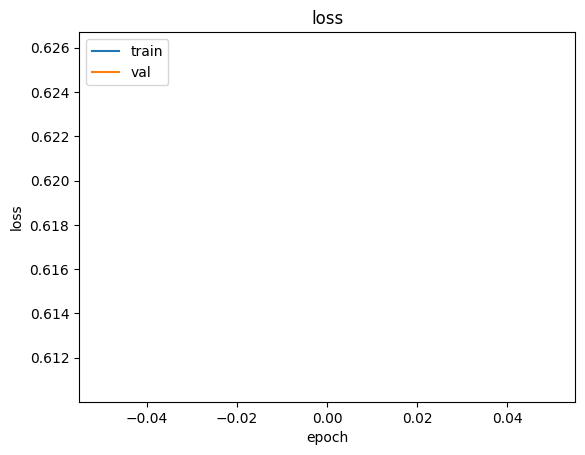

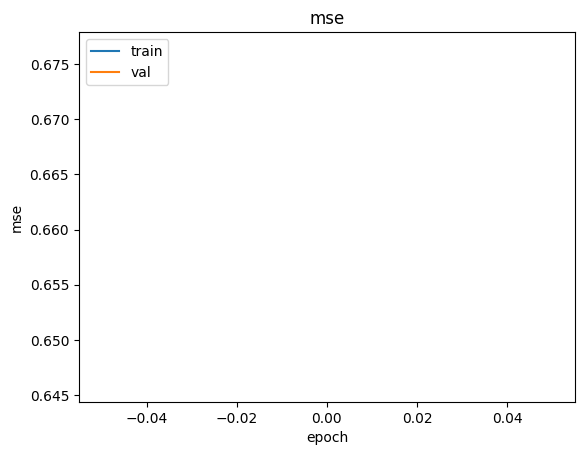

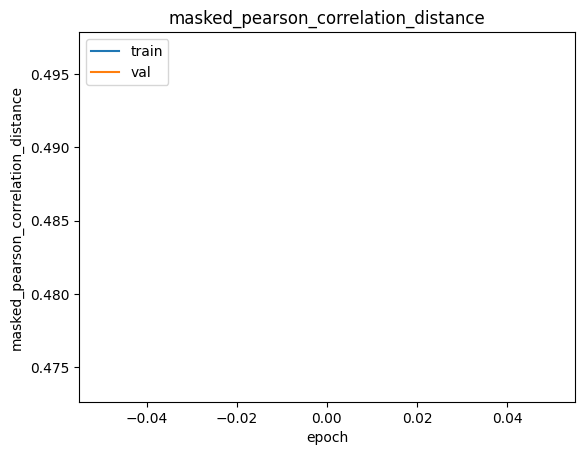

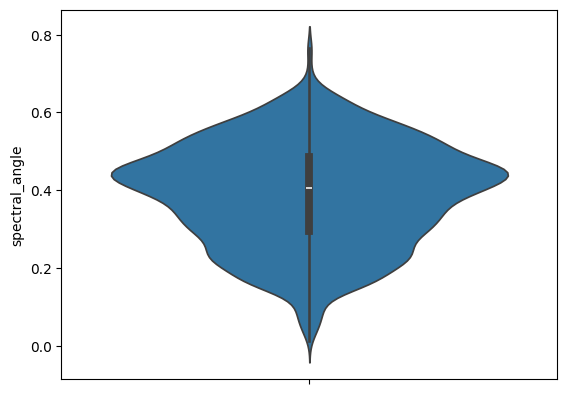

In [59]:
report = IntensityReport(output_path="ptm/output/scratch", history=history)
report.generate_report(test_int_data, predictions)

In [60]:
predictions_df = report.generate_intensity_results_df(test_int_data, predictions)
predictions_df.head()

,sequences,intensities_pred,precursor_charge_onehot,intensities_raw
0,AAADQMRDFLVR,"[0.02310439758002758, 0.005804609041661024, 0....","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,AAADQMRDFLVR,"[0.02310439758002758, 0.005804609041661024, 0....","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,AAADQMRDFLVR,"[0.02310439758002758, 0.005804609041661024, 0....","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,AAADQMRDFLVR,"[0.02310439758002758, 0.005804609041661024, 0....","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,AAADQMRDFLVR,"[0.03083113022148609, 0.0004229862242937088, 0...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.3799999952316284, 0.0, -1.0, 0.0, 0.0, -1.0..."


In [61]:
predictions_acc = normalize_intensity_predictions(predictions_df)
predictions_acc.head()

,sequences,intensities_pred,precursor_charge_onehot,intensities_raw,spectral_angle
0,AAADQMRDFLVR,0.254117,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.341216
1,AAADQMRDFLVR,0.254117,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.341216
2,AAADQMRDFLVR,0.254117,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.337402
3,AAADQMRDFLVR,0.254117,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.337402
4,AAADQMRDFLVR,0.254748,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.3799999952316284, 0.0, -1.0, 0.0, 0.0, -1.0...",0.141137


In [62]:
spectral_angle = predictions_acc['spectral_angle'].describe()
spectral_angle

count    2416.000000
mean        0.390885
std         0.131757
min         0.012319
25%         0.295346
50%         0.404906
75%         0.484400
max         0.765773
Name: spectral_angle, dtype: float64

In [63]:
spectral_angle.to_csv('ptm/output/scratch/spectracle_angle_scratch.csv')

In [64]:
plot_violin_spectral_angle = sns.violinplot(predictions_acc['spectral_angle']).set_title('AA')
fig = plot_violin_spectral_angle.get_figure()
fig.savefig('ptm/output/scratch/spectral_angle_scratch.png')
fig.clear()

<Figure size 640x480 with 0 Axes>

### 2.2 Random initialization of row "r" 

#### 2.2.1 Create Random Uniform Weight Matrix

In [65]:
newrow_r = np.random.uniform(-1, 1, size=(1, 32))
weights_hpf5_random_r = np.vstack([weights_hpf5, newrow_r])

#### 2.2.2 Create Model

In [66]:
model_random_r = PrositIntensityPredictor(seq_length=30)
model_random_r(inputs={'sequence':sequences, 'collision_energy':tf.convert_to_tensor(int_data.collision_energy, dtype=np.float32), 'precursor_charge':tf.convert_to_tensor(int_data.precursor_charge, dtype=np.float32)})

<tf.Tensor: shape=(21727, 174), dtype=float32, numpy=
array([[-1.14472435e-07, -3.47442722e-07, -4.04140621e-07, ...,
        -1.11165741e-06, -5.80919391e-07,  5.16875559e-07],
       [ 2.39074075e-06,  2.05816582e-06,  1.96257361e-06, ...,
         1.32782498e-06, -3.99662980e-07, -7.11303073e-07],
       [ 2.39309270e-06,  2.05581318e-06,  1.95985513e-06, ...,
         1.32407604e-06, -4.01738049e-07, -7.11478719e-07],
       ...,
       [ 1.24079543e-06,  2.33153287e-07,  6.31740420e-07, ...,
         2.72400484e-06, -3.59326719e-07,  2.68176245e-06],
       [ 1.24079543e-06,  2.33153287e-07,  6.31740420e-07, ...,
         2.72400484e-06, -3.59326719e-07,  2.68176245e-06],
       [ 1.24079543e-06,  2.33153287e-07,  6.31740420e-07, ...,
         2.72400484e-06, -3.59326719e-07,  2.68176245e-06]], dtype=float32)>

#### 2.2.3 Assign Weight Matrix to Model

In [67]:
model_random_r.layers[1].set_weights([weights_hpf5_random_r])    

In [68]:
#model_random_r.layers[1].get_weights()[0]

#### 2.2.4 Train Model

In [69]:
tf.get_logger().setLevel('ERROR')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_random_r.compile(optimizer=optimizer,
              loss=masked_spectral_distance,
              metrics=['mse',masked_pearson_correlation_distance])

In [70]:
wandb.init(project=project_name, name='random model')
history = model_random_r.fit(int_data.train_data,
                    validation_data=int_data.val_data,
                    epochs=1,callbacks=[WandbCallback(save_model=False)])

272/272 [==============================] - 95s 335ms/step - loss: 0.6275 - mse: 0.6435 - masked_pearson_correlation_distance: 0.4947 - val_loss: 0.6052 - val_mse: 0.6635 - val_masked_pearson_correlation_distance: 0.4623


In [ ]:
wandb.finish()

#### 2.2.5 Testing and Prediction

In [72]:
predictions = model_random_r.predict(test_int_data.test_data)

76/76 [==============================] - 6s 70ms/step


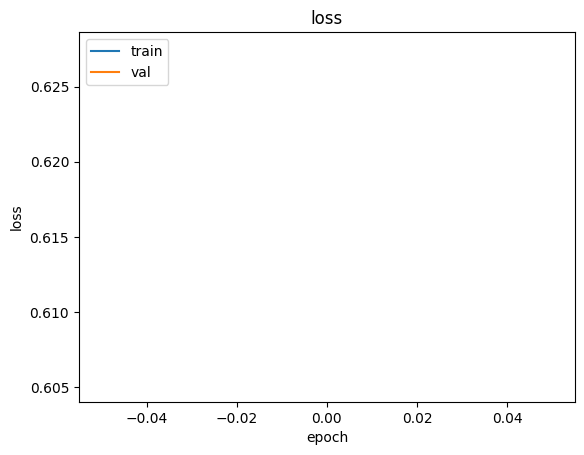

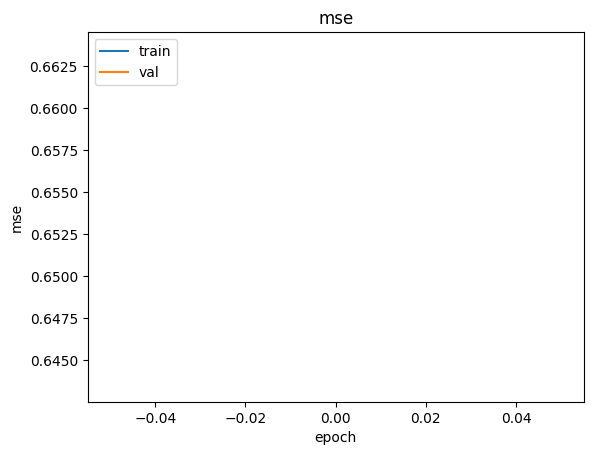

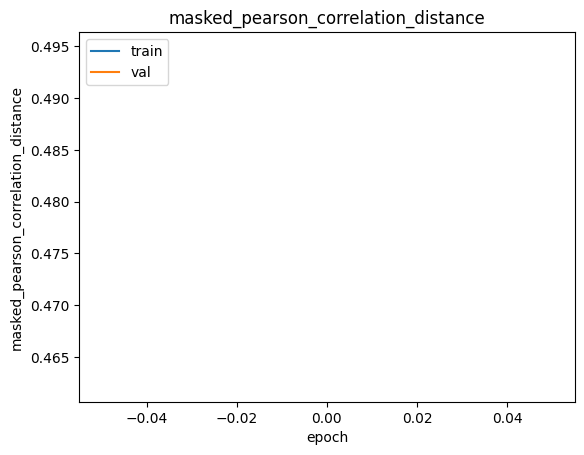

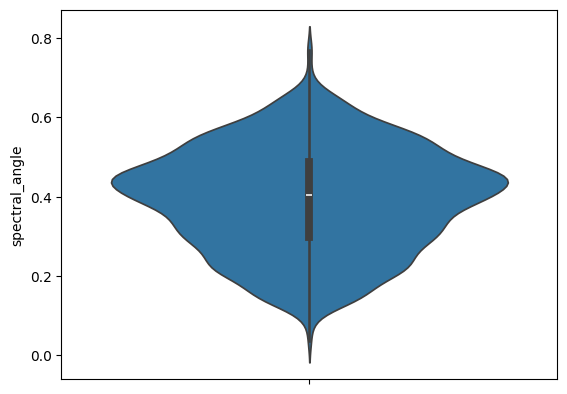

In [73]:
report = IntensityReport(output_path="ptm/output/random", history=history)
report.generate_report(test_int_data, predictions)

In [74]:
predictions_df = report.generate_intensity_results_df(test_int_data, predictions)
predictions_df.head()

,sequences,intensities_pred,precursor_charge_onehot,intensities_raw
0,AAADQMRDFLVR,"[0.01841803640127182, 0.005777354817837477, 0....","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,AAADQMRDFLVR,"[0.01841803640127182, 0.005777354817837477, 0....","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,..."
2,AAADQMRDFLVR,"[0.01841803640127182, 0.005777354817837477, 0....","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,..."
3,AAADQMRDFLVR,"[0.01841803640127182, 0.005777354817837477, 0....","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4,AAADQMRDFLVR,"[0.023320777341723442, 0.002444875193759799, 0...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.3799999952316284, 0.0, -1.0, 0.0, 0.0, -1.0..."


In [75]:
predictions_acc = normalize_intensity_predictions(predictions_df)
predictions_acc.head()

,sequences,intensities_pred,precursor_charge_onehot,intensities_raw,spectral_angle
0,AAADQMRDFLVR,0.341324,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.316667
1,AAADQMRDFLVR,0.341324,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.316667
2,AAADQMRDFLVR,0.341324,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.311904
3,AAADQMRDFLVR,0.341324,"[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.03999999910593033, 0.0, 0.0, 0.0, 0.0, 0.0,...",0.311904
4,AAADQMRDFLVR,0.280726,"[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.3799999952316284, 0.0, -1.0, 0.0, 0.0, -1.0...",0.138049


In [76]:
spectral_angle = predictions_acc['spectral_angle'].describe()
spectral_angle

count    2416.000000
mean        0.394251
std         0.129822
min         0.037382
25%         0.297834
50%         0.404728
75%         0.486786
max         0.774274
Name: spectral_angle, dtype: float64

In [77]:
spectral_angle.to_csv('ptm/output/random/spectracle_angle_random_r.csv')

In [78]:
plot_violin_spectral_angle = sns.violinplot(predictions_acc['spectral_angle']).set_title('AA')
fig = plot_violin_spectral_angle.get_figure()
fig.savefig('ptm/output/random/spectral_angle_random_r.png')
fig.clear()

<Figure size 640x480 with 0 Axes>

### Random initialization of weight matrix

In [79]:
#rand_uni_weights = np.random.uniform(-1, 1, size=(24, 32))
#rand_uni_weights.shape

In [80]:
#model_random_matrix = PrositIntensityPredictor(seq_length=30)
#model_random_matrix(inputs={'sequence':sequences, 'collision_energy':tf.convert_to_tensor(int_data.collision_energy, dtype=np.float32), 'precursor_charge':tf.convert_to_tensor(int_data.precursor_charge, dtype=np.float32)})

In [81]:
#model_random.layers[1].set_weights([weights_hpf5])    

In [82]:
#model_random.layers[1].get_weights()[0]

### 2.3 Clever Copying

#### 2.3.1 Create Model

In [83]:
model_copy = PrositIntensityPredictor(seq_length=30)
model_copy(inputs={'sequence':sequences, 'collision_energy':tf.convert_to_tensor(int_data.collision_energy, dtype=np.float32), 'precursor_charge':tf.convert_to_tensor(int_data.precursor_charge, dtype=np.float32)})

<tf.Tensor: shape=(21727, 174), dtype=float32, numpy=
array([[-2.0064653e-07, -7.2934995e-07,  7.9094025e-07, ...,
        -3.8977274e-07,  7.7672230e-06,  4.7556468e-06],
       [-7.2217532e-08, -5.2534045e-07,  6.7762130e-08, ...,
        -7.5047836e-07, -5.7367248e-07, -2.2116676e-06],
       [-7.2501898e-08, -5.2446626e-07,  6.5791937e-08, ...,
        -7.5054419e-07, -5.7729363e-07, -2.2109280e-06],
       ...,
       [-4.3832603e-08, -1.0362711e-06,  2.9963585e-06, ...,
         3.6585391e-06, -5.9342301e-07, -1.6511446e-07],
       [-4.3832603e-08, -1.0362711e-06,  2.9963585e-06, ...,
         3.6585391e-06, -5.9342301e-07, -1.6511446e-07],
       [-4.3832603e-08, -1.0362711e-06,  2.9963585e-06, ...,
         3.6585391e-06, -5.9342301e-07, -1.6511446e-07]], dtype=float32)>

In [84]:
tf.get_logger().setLevel('ERROR')
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model_copy.compile(optimizer=optimizer,
              loss=masked_spectral_distance,
              metrics=['mse',masked_pearson_correlation_distance])

In [85]:
#weights_model = model_random.layers[1].get_weights()[0]

#### 2.3.2 Training and Prediction

In [86]:
first = True
for AA,row in zip(dlomix.constants.ALPHABET_UNMOD.keys(),weights_hpf5[1:]):
    wandb.init(project=project_name, name=f'{AA}')
    
    #Add current row to loaded weight matrix
    new_weights = np.vstack([weights_hpf5, row])

    #Set weight matrix to embedding layer
    model_copy.layers[1].set_weights([new_weights])
    
    #Train Model
    history = model_copy.fit(int_data.train_data,
                    validation_data=int_data.val_data,
                    epochs=1,callbacks=[WandbCallback(save_model=False)])

    #Prediction
    predictions = model_copy.predict(test_int_data.test_data)
    report = IntensityReport(output_path="ptm/output/copy_clever", history=history)
    predictions_df = report.generate_intensity_results_df(test_int_data, predictions)
    predictions_acc = normalize_intensity_predictions(predictions_df)
    plot_violin_spectral_angle = sns.violinplot(predictions_acc['spectral_angle']).set_title(f'{AA}')
    fig = plot_violin_spectral_angle.get_figure()
    fig.savefig(f'ptm/output/copy_clever/{AA}_spectral_angle.png')
    fig.clear()
    spectral_angle = predictions_acc['spectral_angle'].describe()
    
    #Dataframe with AA and spectral angle informations
    if first:
        df = spectral_angle.to_frame(name=f'{AA}')
        first = False
    else:
        current_AA = spectral_angle.to_frame(name=f'{AA}')
        df = pd.merge(df, current_AA, left_index=True, right_index=True)
    df.to_csv('ptm/output/copy_clever/spectracle_angle_copy.csv')
    
    wandb.finish()

76/76 [==============================] - 6s 69ms/step


epoch,▁
loss,▁
masked_pearson_correlation_distance,▁
mse,▁
val_loss,▁
val_masked_pearson_correlation_distance,▁
val_mse,▁
best_epoch,0
best_val_loss,0.60769
epoch,0
loss,0.62837


76/76 [==============================] - 6s 73ms/step


epoch,▁
loss,▁
masked_pearson_correlation_distance,▁
mse,▁
val_loss,▁
val_masked_pearson_correlation_distance,▁
val_mse,▁
best_epoch,0
best_val_loss,0.582
epoch,0
loss,0.60288


76/76 [==============================] - 6s 80ms/step


epoch,▁
loss,▁
masked_pearson_correlation_distance,▁
mse,▁
val_loss,▁
val_masked_pearson_correlation_distance,▁
val_mse,▁
best_epoch,0
best_val_loss,0.56839
epoch,0
loss,0.58822


126/272 [============>.................] - ETA: 1:19 - loss: 0.5767 - mse: 0.6476 - masked_pearson_correlation_distance: 0.4472

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [87]:
df = df.T

In [ ]:
df_sort_max = df.sort_values(by=['max'], ascending=True)
df.to_csv('ptm/output/copy_clever/spectracle_angle_copy_max.csv')

In [ ]:
df_sort_mean = df.sort_values(by=['mean'], ascending=True)
df.to_csv('ptm/output/copy_clever/spectracle_angle_copy_mean.csv')